## Importing data and libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
file_path = 'SpotifyFeatures.csv'
data = pd.read_csv(file_path)
data.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


## Vizualiing the data

#### Get a sense of why the preprocessing steps are necessary

In [2]:
# visulize "duplicate songs"(same trackid = same song)
data['track_id'].value_counts()

track_id
3R73Y7X53MIQZWnKloWq5i    8
0wY9rA9fJkuESyYm9uzVK5    8
6sVQNUvcVFTXvlk3ec0ngd    8
0UE0RhnRaEYsiYgXpyLoZc    8
6AIte2Iej1QKlaofpjCzW1    8
                         ..
2sERVoTuQG14MKze0PuLZd    1
2rQCKDafhIA6GKPGiZsyfI    1
150kk5S2hUULZD4yApAwSH    1
7cq0WqlooYmk0u2EQeA85S    1
34XO9RwPMKjbvRry54QzWn    1
Name: count, Length: 176774, dtype: int64

In [3]:
# display how many songs are "duplicated"(same trackid = same song) distrobution
data['track_id'].value_counts().value_counts()

count
1    141650
2     21871
3      8091
4      3374
5      1300
6       358
7       124
8         6
Name: count, dtype: int64

In [4]:
# Sample to Understand why there are duplicated songs
data[data['track_id'] == '6AIte2Iej1QKlaofpjCzW1']

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
3108,Alternative,dvsn,With Me,6AIte2Iej1QKlaofpjCzW1,60,0.0314,0.771,419500,0.466,0.000761,C,0.31,-8.651,Major,0.0308,110.011,4/4,0.245
70327,Hip-Hop,dvsn,With Me,6AIte2Iej1QKlaofpjCzW1,65,0.0314,0.771,419500,0.466,0.000761,C,0.31,-8.651,Major,0.0308,110.011,4/4,0.245
78499,Children’s Music,dvsn,With Me,6AIte2Iej1QKlaofpjCzW1,65,0.0314,0.771,419500,0.466,0.000761,C,0.31,-8.651,Major,0.0308,110.011,4/4,0.245
94734,Indie,dvsn,With Me,6AIte2Iej1QKlaofpjCzW1,65,0.0314,0.771,419500,0.466,0.000761,C,0.31,-8.651,Major,0.0308,110.011,4/4,0.245
112832,Pop,dvsn,With Me,6AIte2Iej1QKlaofpjCzW1,65,0.0314,0.771,419500,0.466,0.000761,C,0.31,-8.651,Major,0.0308,110.011,4/4,0.245
116540,Rap,dvsn,With Me,6AIte2Iej1QKlaofpjCzW1,65,0.0314,0.771,419500,0.466,0.000761,C,0.31,-8.651,Major,0.0308,110.011,4/4,0.245
152747,R&B,dvsn,With Me,6AIte2Iej1QKlaofpjCzW1,65,0.0314,0.771,419500,0.466,0.000761,C,0.31,-8.651,Major,0.0308,110.011,4/4,0.245
192546,Soul,dvsn,With Me,6AIte2Iej1QKlaofpjCzW1,65,0.0314,0.771,419500,0.466,0.000761,C,0.31,-8.651,Major,0.0308,110.011,4/4,0.245


In [5]:
# Prints the distribution of songs into all genres
data['genre'].value_counts()

genre
Comedy              9681
Soundtrack          9646
Indie               9543
Jazz                9441
Pop                 9386
Electronic          9377
Children’s Music    9353
Folk                9299
Hip-Hop             9295
Rock                9272
Alternative         9263
Classical           9256
Rap                 9232
World               9096
Soul                9089
Blues               9023
R&B                 8992
Anime               8936
Reggaeton           8927
Ska                 8874
Reggae              8771
Dance               8701
Country             8664
Opera               8280
Movie               7806
Children's Music    5403
A Capella            119
Name: count, dtype: int64

In [6]:
data.describe() 

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,232725.000000,232725.000000,232725.000000,2.327250e+05,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000
mean,41.127502,0.368560,0.554364,2.351223e+05,0.570958,0.148301,0.215009,-9.569885,0.120765,117.666585,0.454917
std,18.189948,0.354768,0.185608,1.189359e+05,0.263456,0.302768,0.198273,5.998204,0.185518,30.898907,0.260065
min,0.000000,0.000000,0.056900,1.538700e+04,0.000020,0.000000,0.009670,-52.457000,0.022200,30.379000,0.000000
25%,29.000000,0.037600,0.435000,1.828570e+05,0.385000,0.000000,0.097400,-11.771000,0.036700,92.959000,0.237000
50%,43.000000,0.232000,0.571000,2.204270e+05,0.605000,0.000044,0.128000,-7.762000,0.050100,115.778000,0.444000
75%,55.000000,0.722000,0.692000,2.657680e+05,0.787000,0.035800,0.264000,-5.501000,0.105000,139.054000,0.660000
max,100.000000,0.996000,0.989000,5.552917e+06,0.999000,0.999000,1.000000,3.744000,0.967000,242.903000,1.000000


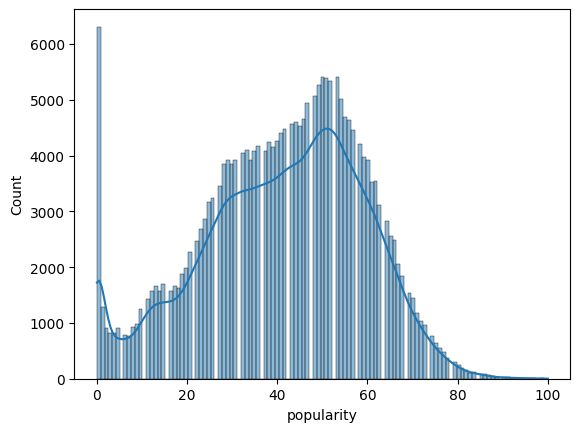

35.019% of the songs are above 50 in popularity
with an average popularity of 41.128


In [7]:
# how many songs are above 50 in popularity
hits = data[data['popularity'] > 50].shape[0]
miss = data[data['popularity'] < 50].shape[0]

# visulize the distribution of popularity
sns.histplot(data['popularity'], kde=True)
plt.show()

hits_ratio = hits/(hits+miss)*100
print(f"{hits_ratio:.3f}% of the songs are above 50 in popularity")
print(f"with an average popularity of {data['popularity'].mean():.3f}")

#### Conclusions
- data has songs that are to long we want 8.3 minutes to be max and 1 minute to be min because we want to measure normal songs
- some attributes need to be transformed to numerical scale
- A capella is to small to be considered
- Children's Music and Children’s Music should be the same

## Data Preprocessing

### Step number 1 Data Cleaning

#### First steps based on visualization
- remove song that are to long in duration songs longer than 500000 ms (500 seconds = 8.3 minutes)
- remove songs that are to short in duration songs shorter than 60000 ms (60 seconds = 1 minute)
- Remove A Capella songs due to being to small
- Combine union child genres into one genre Children's Music
- Split songs into it's genres
- Convert songs to Miss or Hit based on popularity

#### Create new attribute
- Genre count for each song with multilabeld genres

#### The rest of the preprocessing steps
- Pitch preprocessing
- Time signature preprocessing
- Mode preprocessing (minor/major)
- Grouping songs by genre
- Miss or Hit labeling

#### First steps

In [8]:
# Drop songs that are to long
data = data[data['duration_ms'] < 500000]
# Drop songs that are to short 
data = data[data['duration_ms'] > 60000]

# drop gernre a capella
data = data[data['genre'] != 'A Capella']

# Combine union child genres
data['genre'] = data['genre'].replace('Children’s Music', 'Children\'s Music')

# Create a new column for genre count
#data['genre_count'] = data.groupby('track_id')['genre'].transform('count')

#### Pitch preprocessing

In [9]:
# Function to convert pitch to number
def pitch_to_number(pitch):
    pitch_map = {
        'C': 0,
        'C#': 1, 'Db': 1,
        'D': 2,
        'D#': 3, 'Eb': 3,
        'E': 4, 'Fb': 4,
        'E#': 5, 'F': 5,
        'F#': 6, 'Gb': 6,
        'G': 7,
        'G#': 8, 'Ab': 8,
        'A': 9,
        'A#': 10, 'Bb': 10,
        'B': 11, 'Cb': 11
    }
    return pitch_map.get(pitch, None)

# Replace the pitch column with its numeric representation
# Assuming the column name in your DataFrame that contains pitch values is 'pitch_column'
data['key'] = data['key'].apply(pitch_to_number)

#### Time signature preprocessing

In [10]:
data['time_signature'] = (data['time_signature'].apply(lambda x: x.split('/')[0])).astype(int)

#### Mode preprocessing (minor/major)

In [11]:
# Convert the mode column to 1 for major and 0 for minor
data['mode'] = data['mode'].replace("Minor", 0)
data['mode'] = data['mode'].replace("Major", 1)

#### Grouping songs by genre

In [12]:
# Group by genre and calculate mean popularity
grouped = data.groupby('genre')
mean_popularity = grouped['popularity'].mean()
mean_popularity = mean_popularity.sort_values(ascending=False)

#### Miss or Hit labeling

In [13]:
# Function to label rows as 'hit' or 'MISS'
def label_popularity(row, mean_popularity):
    if row['popularity'] >= mean_popularity[row['genre']]:
        return 'hit'
    else:
        return 'miss'

# Apply the function to each row
data['popularity_label'] = data.apply(lambda row: label_popularity(row, mean_popularity), axis=1)

# Splitting the data into hit and miss, ensuring each genre is split 50/50
# This step might require adjusting the labels for genres with an odd number of entries
for genre in data['genre'].unique():
    genre_data = data[data['genre'] == genre]
    n = len(genre_data) // 2
    popular_indices = genre_data.nlargest(n, 'popularity').index
    nonpopular_indices = genre_data.nsmallest(n, 'popularity').index
    data.loc[popular_indices, 'popularity_label'] = 'hit'
    data.loc[nonpopular_indices, 'popularity_label'] = 'miss'

### Step number 2 Remaking the label popularity to Hit or Miss

#### Summary of what will come
- Visualize the distribution of the target variable in terms of genres
- Visualize the distribution of hit and miss songs in terms of genres songs from spotify with a popularity over 50 and under 50
- Visualize the distribution of the new 50/50 split to balance the dataset

#### Visualize the distribution of the target variable in terms of genres

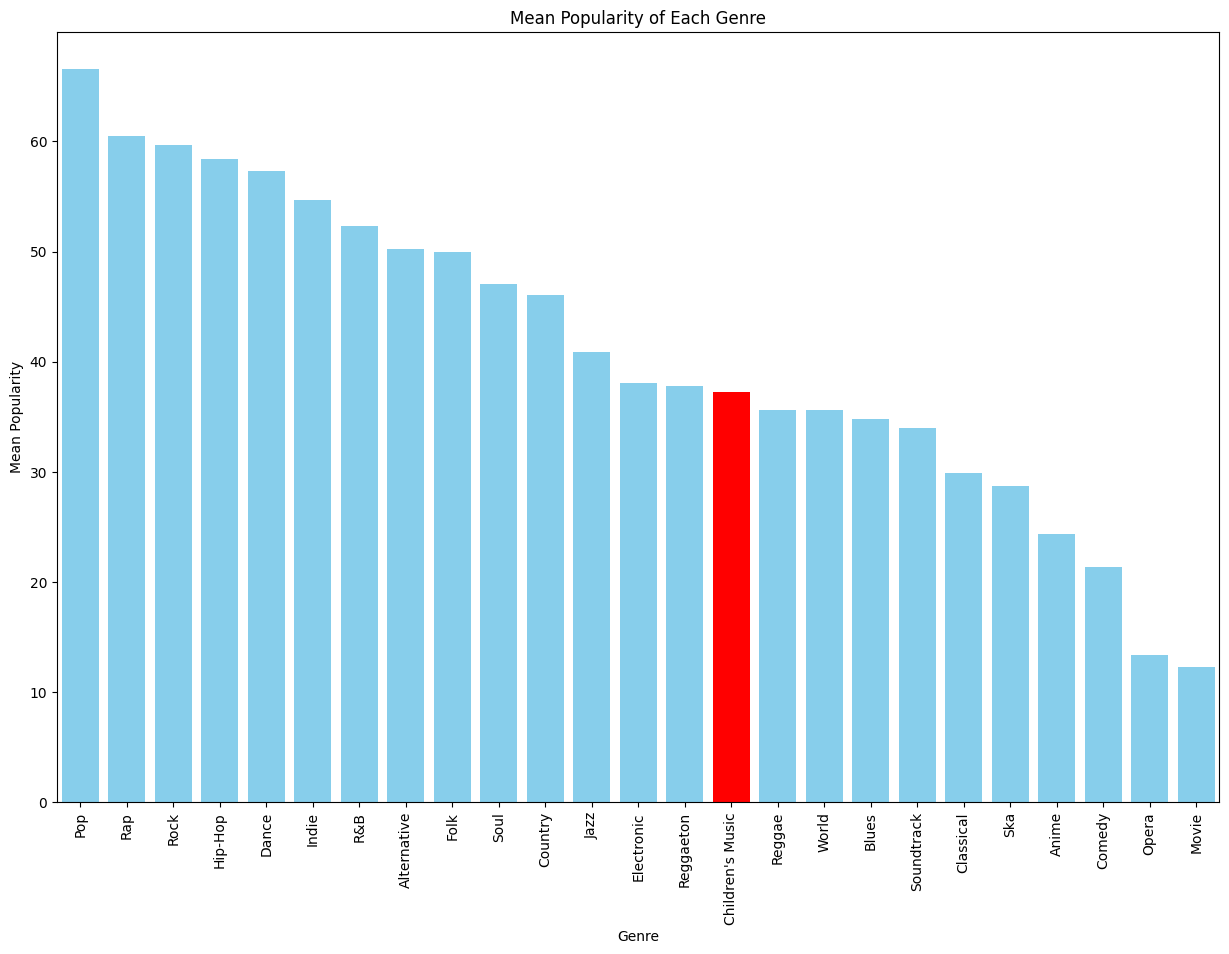

In [14]:
# plot the popularity of each genre and color children's music
mean_popularity.plot(kind='bar', figsize=(15, 10))
colors = ['red' if genre == 'Children\'s Music' else 'skyblue' for genre in mean_popularity.index]
plt.bar(mean_popularity.index, mean_popularity, color=colors)
plt.title('Mean Popularity of Each Genre')
plt.xlabel('Genre')
plt.ylabel('Mean Popularity')
plt.show()

#### Visualize the distribution of hit and miss songs in terms of genres songs from spotify with a popularity over 50 and under 50

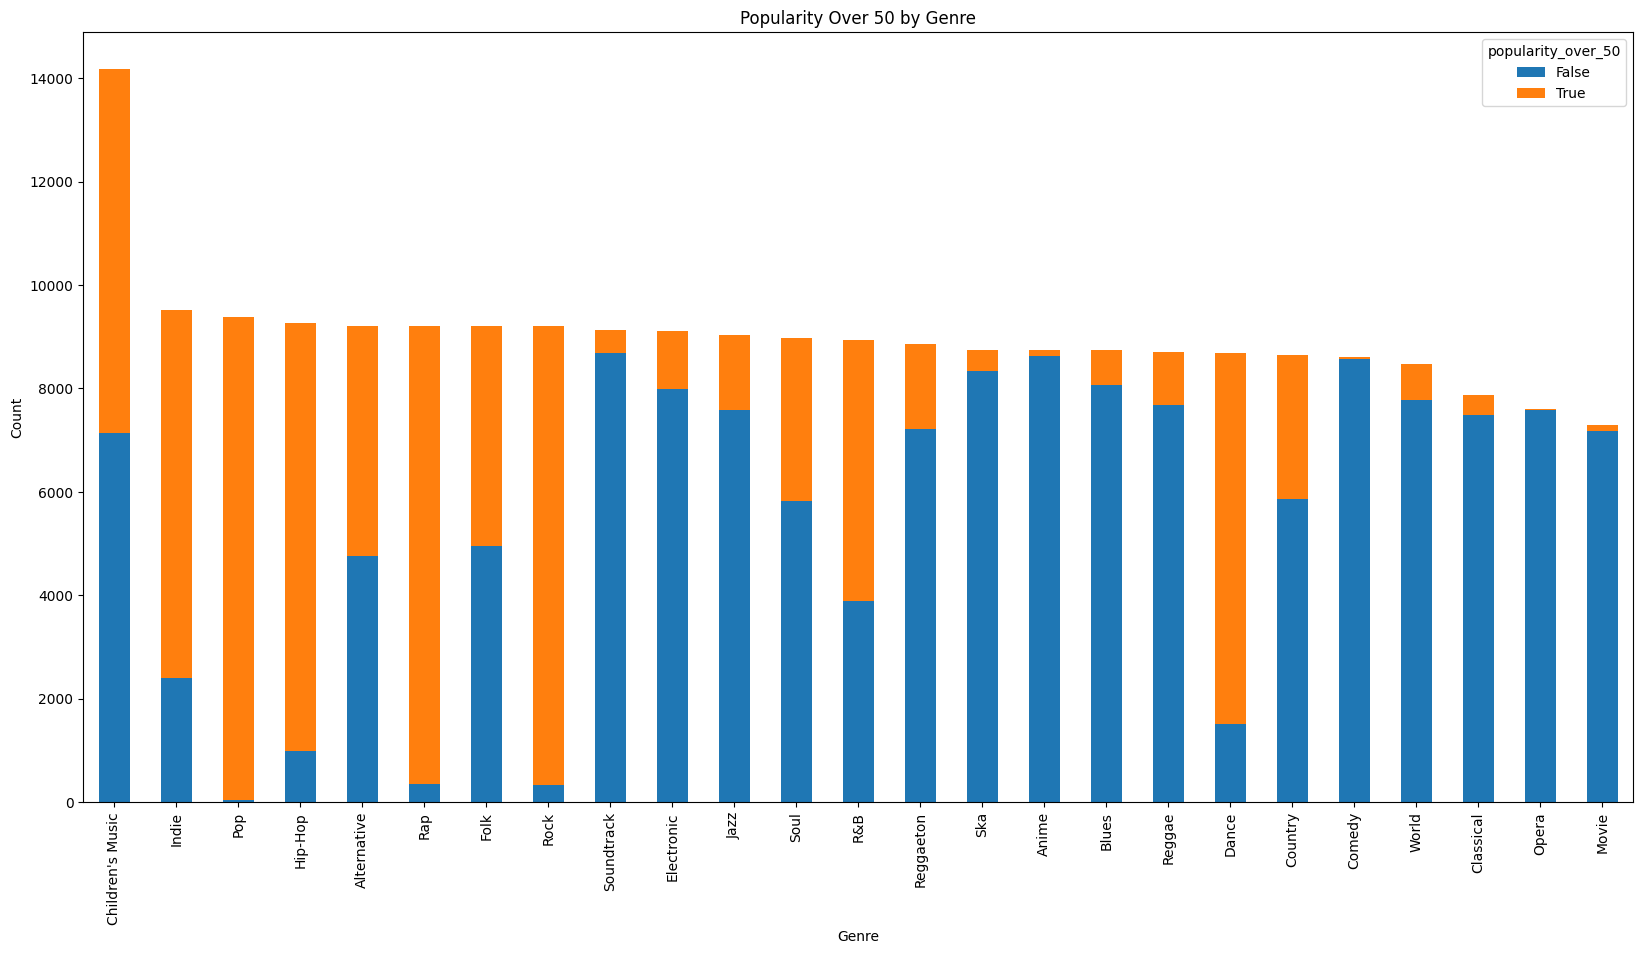

In [15]:
data['popularity_over_50'] = data['popularity'] >= 50

popularity_over_50_df = data.groupby(['genre', 'popularity_over_50']).size().unstack(fill_value=0)
popularity_over_50_df['total'] = popularity_over_50_df.sum(axis=1)
popularity_over_50_df_sorted = popularity_over_50_df.sort_values(by='total', ascending=False)
popularity_over_50_df_sorted = popularity_over_50_df_sorted.drop(columns='total')

# Plotting
popularity_over_50_df_sorted.plot(kind='bar', stacked=True, figsize=(20, 10))
plt.title('Popularity Over 50 by Genre')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

In [16]:
accuracy_dict_over50 = {}
for genre in data['genre'].unique():
    genre_data = data[data['genre'] == genre]
    genre_data = genre_data.dropna()
    X = genre_data[['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']]
    y = genre_data['popularity_over_50']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    accuracy_dict_over50[genre] = accuracy
    print(f'Accuracy for {genre}: {accuracy}')

Accuracy for Movie: 0.9869952087611226
Accuracy for R&B: 0.5626398210290827
Accuracy for Alternative: 0.5347448425624322
Accuracy for Country: 0.6589595375722543
Accuracy for Dance: 0.8227848101265823
Accuracy for Electronic: 0.875
Accuracy for Anime: 0.9817142857142858
Accuracy for Folk: 0.5331161780673181
Accuracy for Blues: 0.9165714285714286
Accuracy for Opera: 0.997370151216305
Accuracy for Hip-Hop: 0.8963842417701026
Accuracy for Children's Music: 0.764456981664316
Accuracy for Rap: 0.9647122692725298
Accuracy for Indie: 0.7468487394957983
Accuracy for Classical: 0.9466666666666667
Accuracy for Pop: 0.9957333333333334
Accuracy for Reggae: 0.8770114942528736
Accuracy for Reggaeton: 0.8005649717514124
Accuracy for Jazz: 0.8373893805309734
Accuracy for Rock: 0.9630434782608696
Accuracy for Ska: 0.9537407195888064
Accuracy for Comedy: 0.9970947123765252
Accuracy for Soul: 0.6310517529215359
Accuracy for Soundtrack: 0.9496442255062945
Accuracy for World: 0.9162735849056604


#### Example of the performance when using popularity over 50 as a label

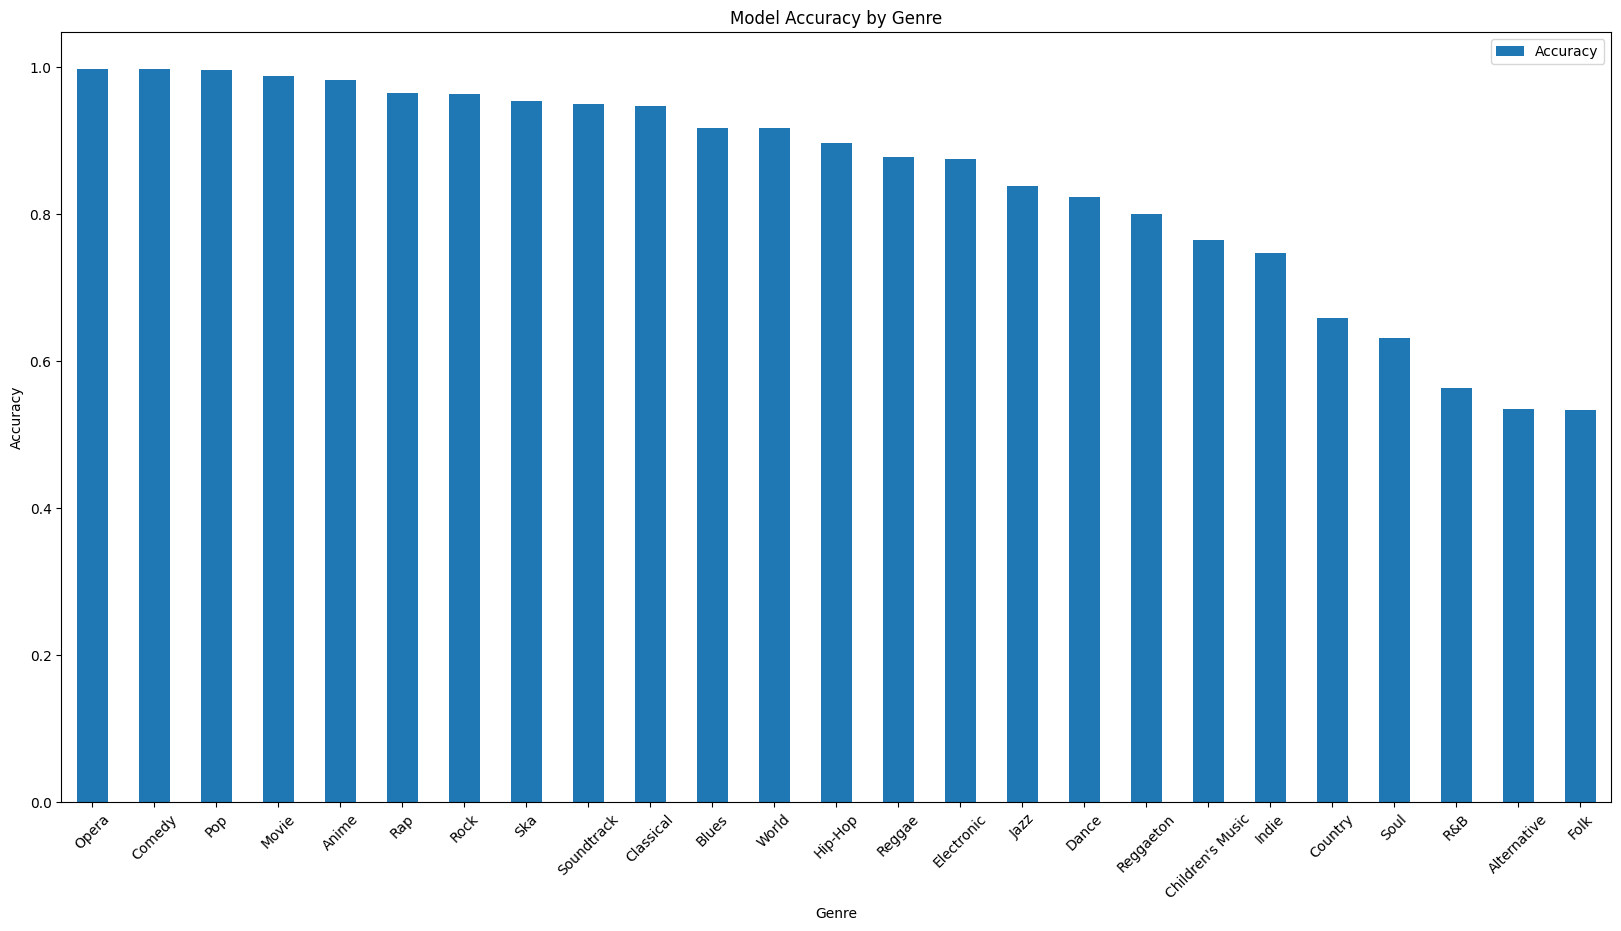

In [17]:
accuracy_dict_over50 = dict(sorted(accuracy_dict_over50.items(), key=lambda item: item[1], reverse=True))

accuracy_df = pd.DataFrame(list(accuracy_dict_over50.items()), columns=['Genre', 'Accuracy'])

accuracy_df.plot(kind='bar', x='Genre', y='Accuracy', figsize=(20, 10), legend=True)
plt.title('Model Accuracy by Genre')
plt.ylabel('Accuracy')
plt.xlabel('Genre')
plt.xticks(rotation=45)
plt.show()

#### Visualize the distribution of the new 50/50 split to balance the dataset

##### * unfair for taylor swift to compete with the best of less populat genres best artsits

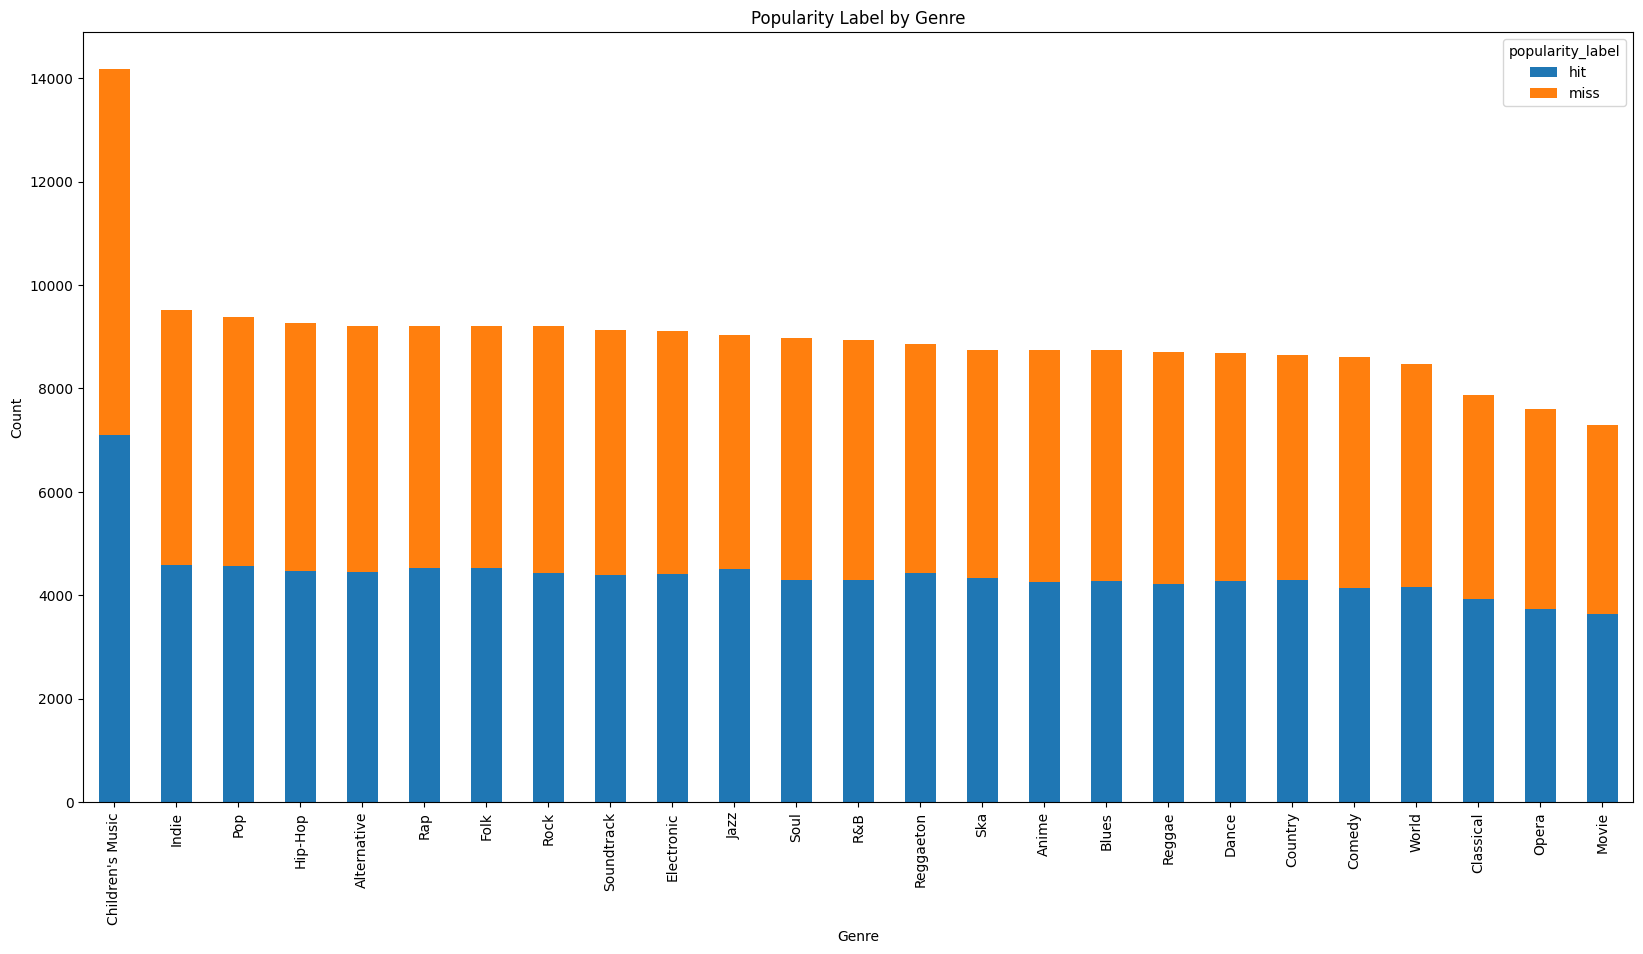

In [18]:

popularity_label_df = data.groupby(['genre', 'popularity_label']).size().unstack(fill_value=0)


popularity_label_df['total'] = popularity_label_df.sum(axis=1)


popularity_label_df_sorted = popularity_label_df.sort_values(by='total', ascending=False)
popularity_label_df_sorted = popularity_label_df_sorted.drop(columns='total')

popularity_label_df_sorted.plot(kind='bar', stacked=True, figsize=(20, 10))
plt.title('Popularity Label by Genre')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

In [19]:
accuracy_dict_50percent = {}
for genre in data['genre'].unique():
    genre_data = data[data['genre'] == genre]
    genre_data = genre_data.dropna()
    X = genre_data[['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']]
    y = genre_data['popularity_label']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    accuracy_dict_50percent[genre] = accuracy
    print(f'Accuracy for {genre}: {accuracy}')

Accuracy for Movie: 0.6461327857631759
Accuracy for R&B: 0.5268456375838926
Accuracy for Alternative: 0.5331161780673181
Accuracy for Country: 0.5190751445086705
Accuracy for Dance: 0.5627157652474108
Accuracy for Electronic: 0.5487938596491229
Accuracy for Anime: 0.6017142857142858
Accuracy for Folk: 0.5168295331161781
Accuracy for Blues: 0.54
Accuracy for Opera: 0.5627876397107167
Accuracy for Hip-Hop: 0.5321100917431193
Accuracy for Children's Music: 0.7651622002820875
Accuracy for Rap: 0.5266015200868621
Accuracy for Indie: 0.5646008403361344
Accuracy for Classical: 0.6241269841269841
Accuracy for Pop: 0.5541333333333334
Accuracy for Reggae: 0.5224137931034483
Accuracy for Reggaeton: 0.5898305084745763
Accuracy for Jazz: 0.5851769911504425
Accuracy for Rock: 0.5266304347826087
Accuracy for Ska: 0.5511136493432325
Accuracy for Comedy: 0.6583381754793725
Accuracy for Soul: 0.5559265442404007
Accuracy for Soundtrack: 0.5123152709359606
Accuracy for World: 0.5501179245283019


#### Example of the performance when using the new 50/50 split as a label

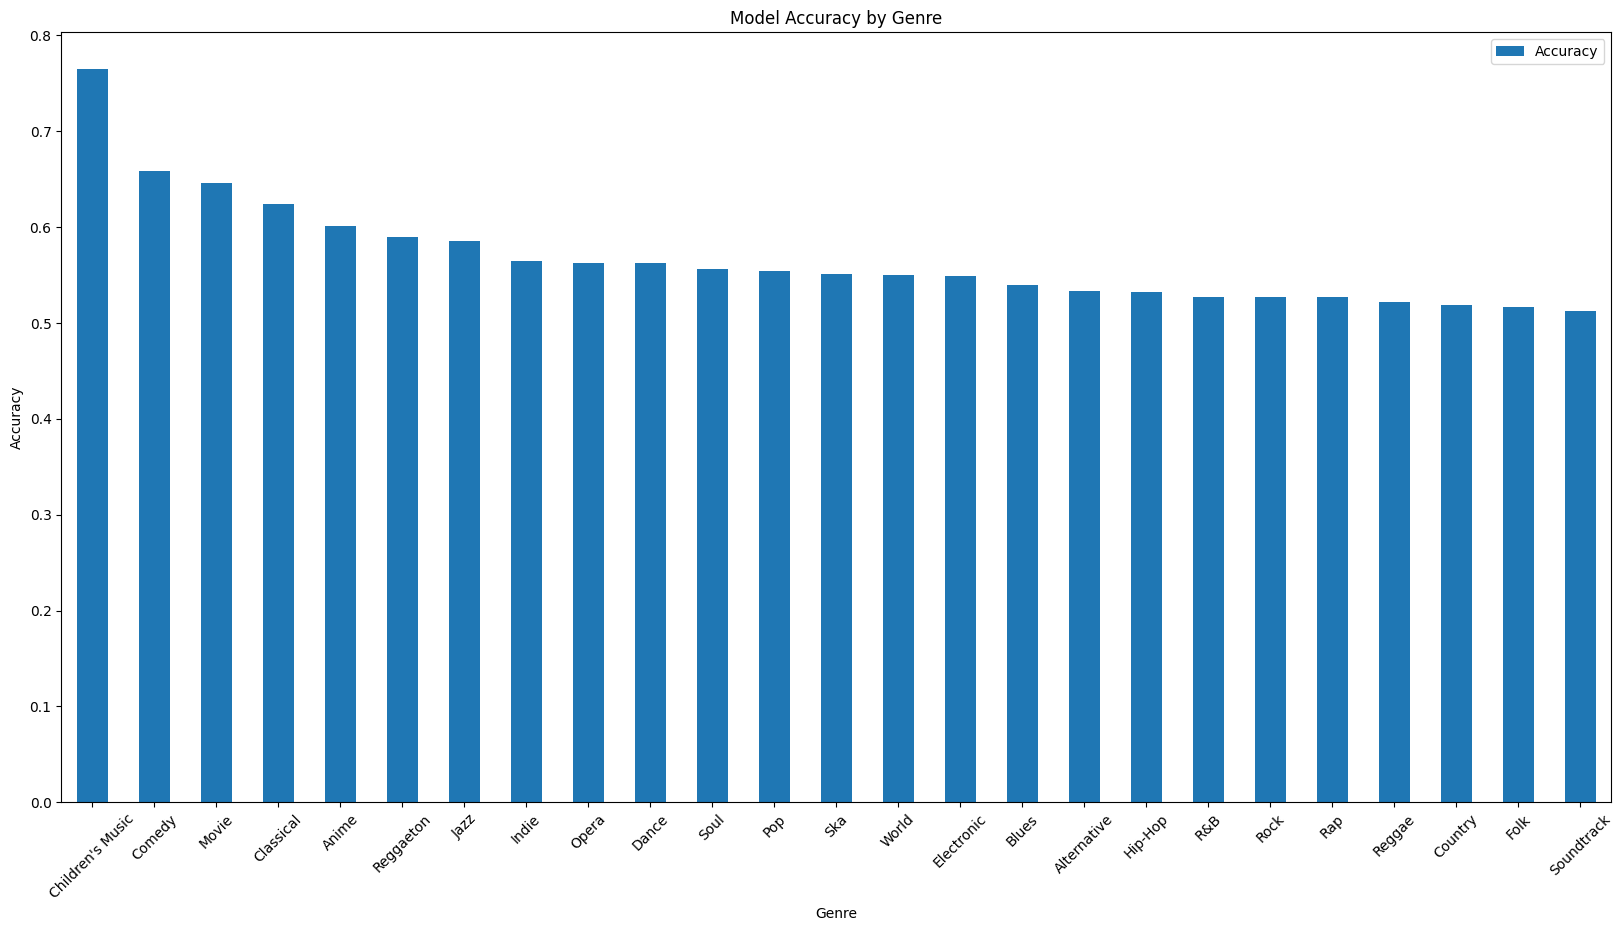

In [20]:
accuracy_dict_50percent = dict(sorted(accuracy_dict_50percent.items(), key=lambda item: item[1], reverse=True))

accuracy_df = pd.DataFrame(list(accuracy_dict_50percent.items()), columns=['Genre', 'Accuracy'])

# Plotting
accuracy_df.plot(kind='bar', x='Genre', y='Accuracy', figsize=(20, 10), legend=True)
plt.title('Model Accuracy by Genre')
plt.ylabel('Accuracy')
plt.xlabel('Genre')
plt.xticks(rotation=45)
plt.show()

### Step number 3 Focusing on children's music genre and cleaning the data

#### Comments on genre selection to further analyze
- By splitting the genres into it's own column we can now analyze the data in terms of genres this results in us having 25 datasets to analyze. To make the analysis easier to understand we will only analyze the biggest dataset children's music. 

#### Next steps
- quick overview
  - check for duplicates
  - check avg popularity (to understand target variable)
  - find weird values
  - Analyze artist distribution (to understand if the artst with the most songs can make the dataset biased) # side note: Each artist has a different style so this could be a good thing
- Analyze 

In [21]:
childrens_music = data[data['genre'] == 'Children\'s Music']


In [22]:
# Check for songs with same track_id to find duplicates
print(childrens_music[childrens_music['track_id'].duplicated()])

Empty DataFrame
Columns: [genre, artist_name, track_name, track_id, popularity, acousticness, danceability, duration_ms, energy, instrumentalness, key, liveness, loudness, mode, speechiness, tempo, time_signature, valence, popularity_label, popularity_over_50]
Index: []


In [23]:
# Find songs with bad values - like the sample below
childrens_music[childrens_music['track_id'] == '7ARLbcqLgOrBI2JfzfKtHD']

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity_label,popularity_over_50
97932,Children's Music,New Medicine,Rich Kids - [Middle Cla$$ MIX],7ARLbcqLgOrBI2JfzfKtHD,51,0.0183,0.619,181907,0.936,0.0,2,0.361,-2.205,0,0.0739,108.011,4,0.739,hit,True


In [24]:
# Replace the $ in the track_name and artist_name columns with s
childrens_music.loc[:, 'track_name'] = childrens_music['track_name'].str.replace('$', 's')
childrens_music.loc[:, 'artist_name'] = childrens_music['artist_name'].str.replace('$', 's')

childrens_music[childrens_music['track_id'] == '7ARLbcqLgOrBI2JfzfKtHD']

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity_label,popularity_over_50
97932,Children's Music,New Medicine,Rich Kids - [Middle Class MIX],7ARLbcqLgOrBI2JfzfKtHD,51,0.0183,0.619,181907,0.936,0.0,2,0.361,-2.205,0,0.0739,108.011,4,0.739,hit,True


In [25]:
total_songs = len(childrens_music)
 
# Calculate the average popularity for each artist
avg_popularity_by_artist = childrens_music.groupby('artist_name')['popularity'].mean()

# Find the top 20 artists by the number of songs
top_20_artists = childrens_music['artist_name'].value_counts().head(20)
top_20_artists_df = top_20_artists.reset_index()
top_20_artists_df.columns = ['artist_name', 'Song Count']

# Merge the average popularity data with the top 20 artists DataFrame
top_20_artists_with_avg_popularity = pd.merge(top_20_artists_df, avg_popularity_by_artist, on='artist_name')

# Calculate the share of total songs for each of the top 20 artists and add it to the DataFrame
top_20_artists_with_avg_popularity['% of songs'] = (top_20_artists_with_avg_popularity['Song Count'] / total_songs) * 100

#'Share of Total Songs (%)' round 2 decimals
top_20_artists_with_avg_popularity['popularity'] = top_20_artists_with_avg_popularity['popularity'].round(2)
top_20_artists_with_avg_popularity['% of songs'] = top_20_artists_with_avg_popularity['% of songs'].round(2)

print(top_20_artists_with_avg_popularity)

                            artist_name  Song Count  popularity  % of songs
0                Kimbo Children's Music         885        0.79        6.24
1                           Juice Music         616        4.60        4.34
2                Children Songs Company         366        0.04        2.58
3                    The Countdown Kids         262        1.54        1.85
4         Music For Little People Choir         177        3.60        1.25
5                     The Hit Crew Kids         162        1.43        1.14
6                      Sugar Kane Music         127        4.68        0.90
7                      Mogul Music Inc.         118        5.64        0.83
8                         The Wayfarers          97        0.00        0.68
9                           Enzo Garcia          91        0.24        0.64
10        Nursery Rhymes and Kids Songs          87        1.14        0.61
11              Five Finger Death Punch          78       53.53        0.55
12          

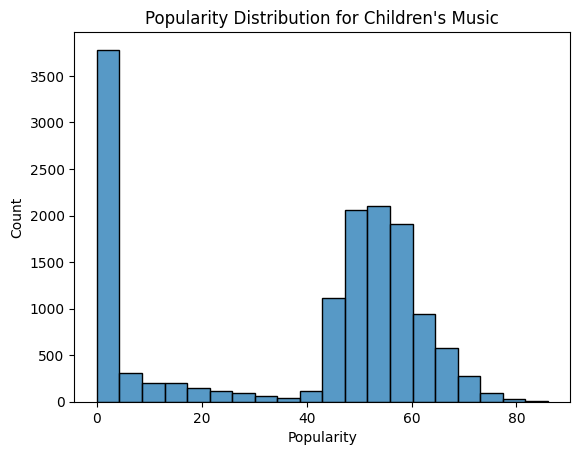

37.217489421720735


In [26]:
# plot the distribution of popularity for children's music
sns.histplot(childrens_music['popularity'])
plt.title('Popularity Distribution for Children\'s Music')
plt.xlabel('Popularity')
plt.ylabel('Count')
plt.show()
print(childrens_music['popularity'].mean())

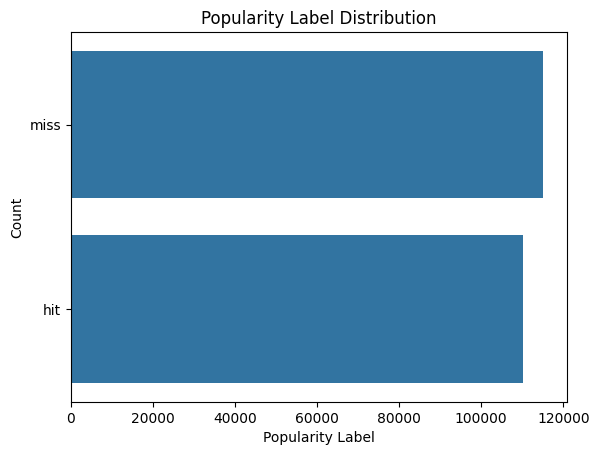

In [27]:
#visulize our new target attribute hit or miss metric to show that it is balanced
sns.countplot(data['popularity_label'])
plt.title('Popularity Label Distribution')
plt.xlabel('Popularity Label')
plt.ylabel('Count')
plt.show()


### Step number 4 Analyzing the children's music genre

##### Plotting the distribution of the attributes

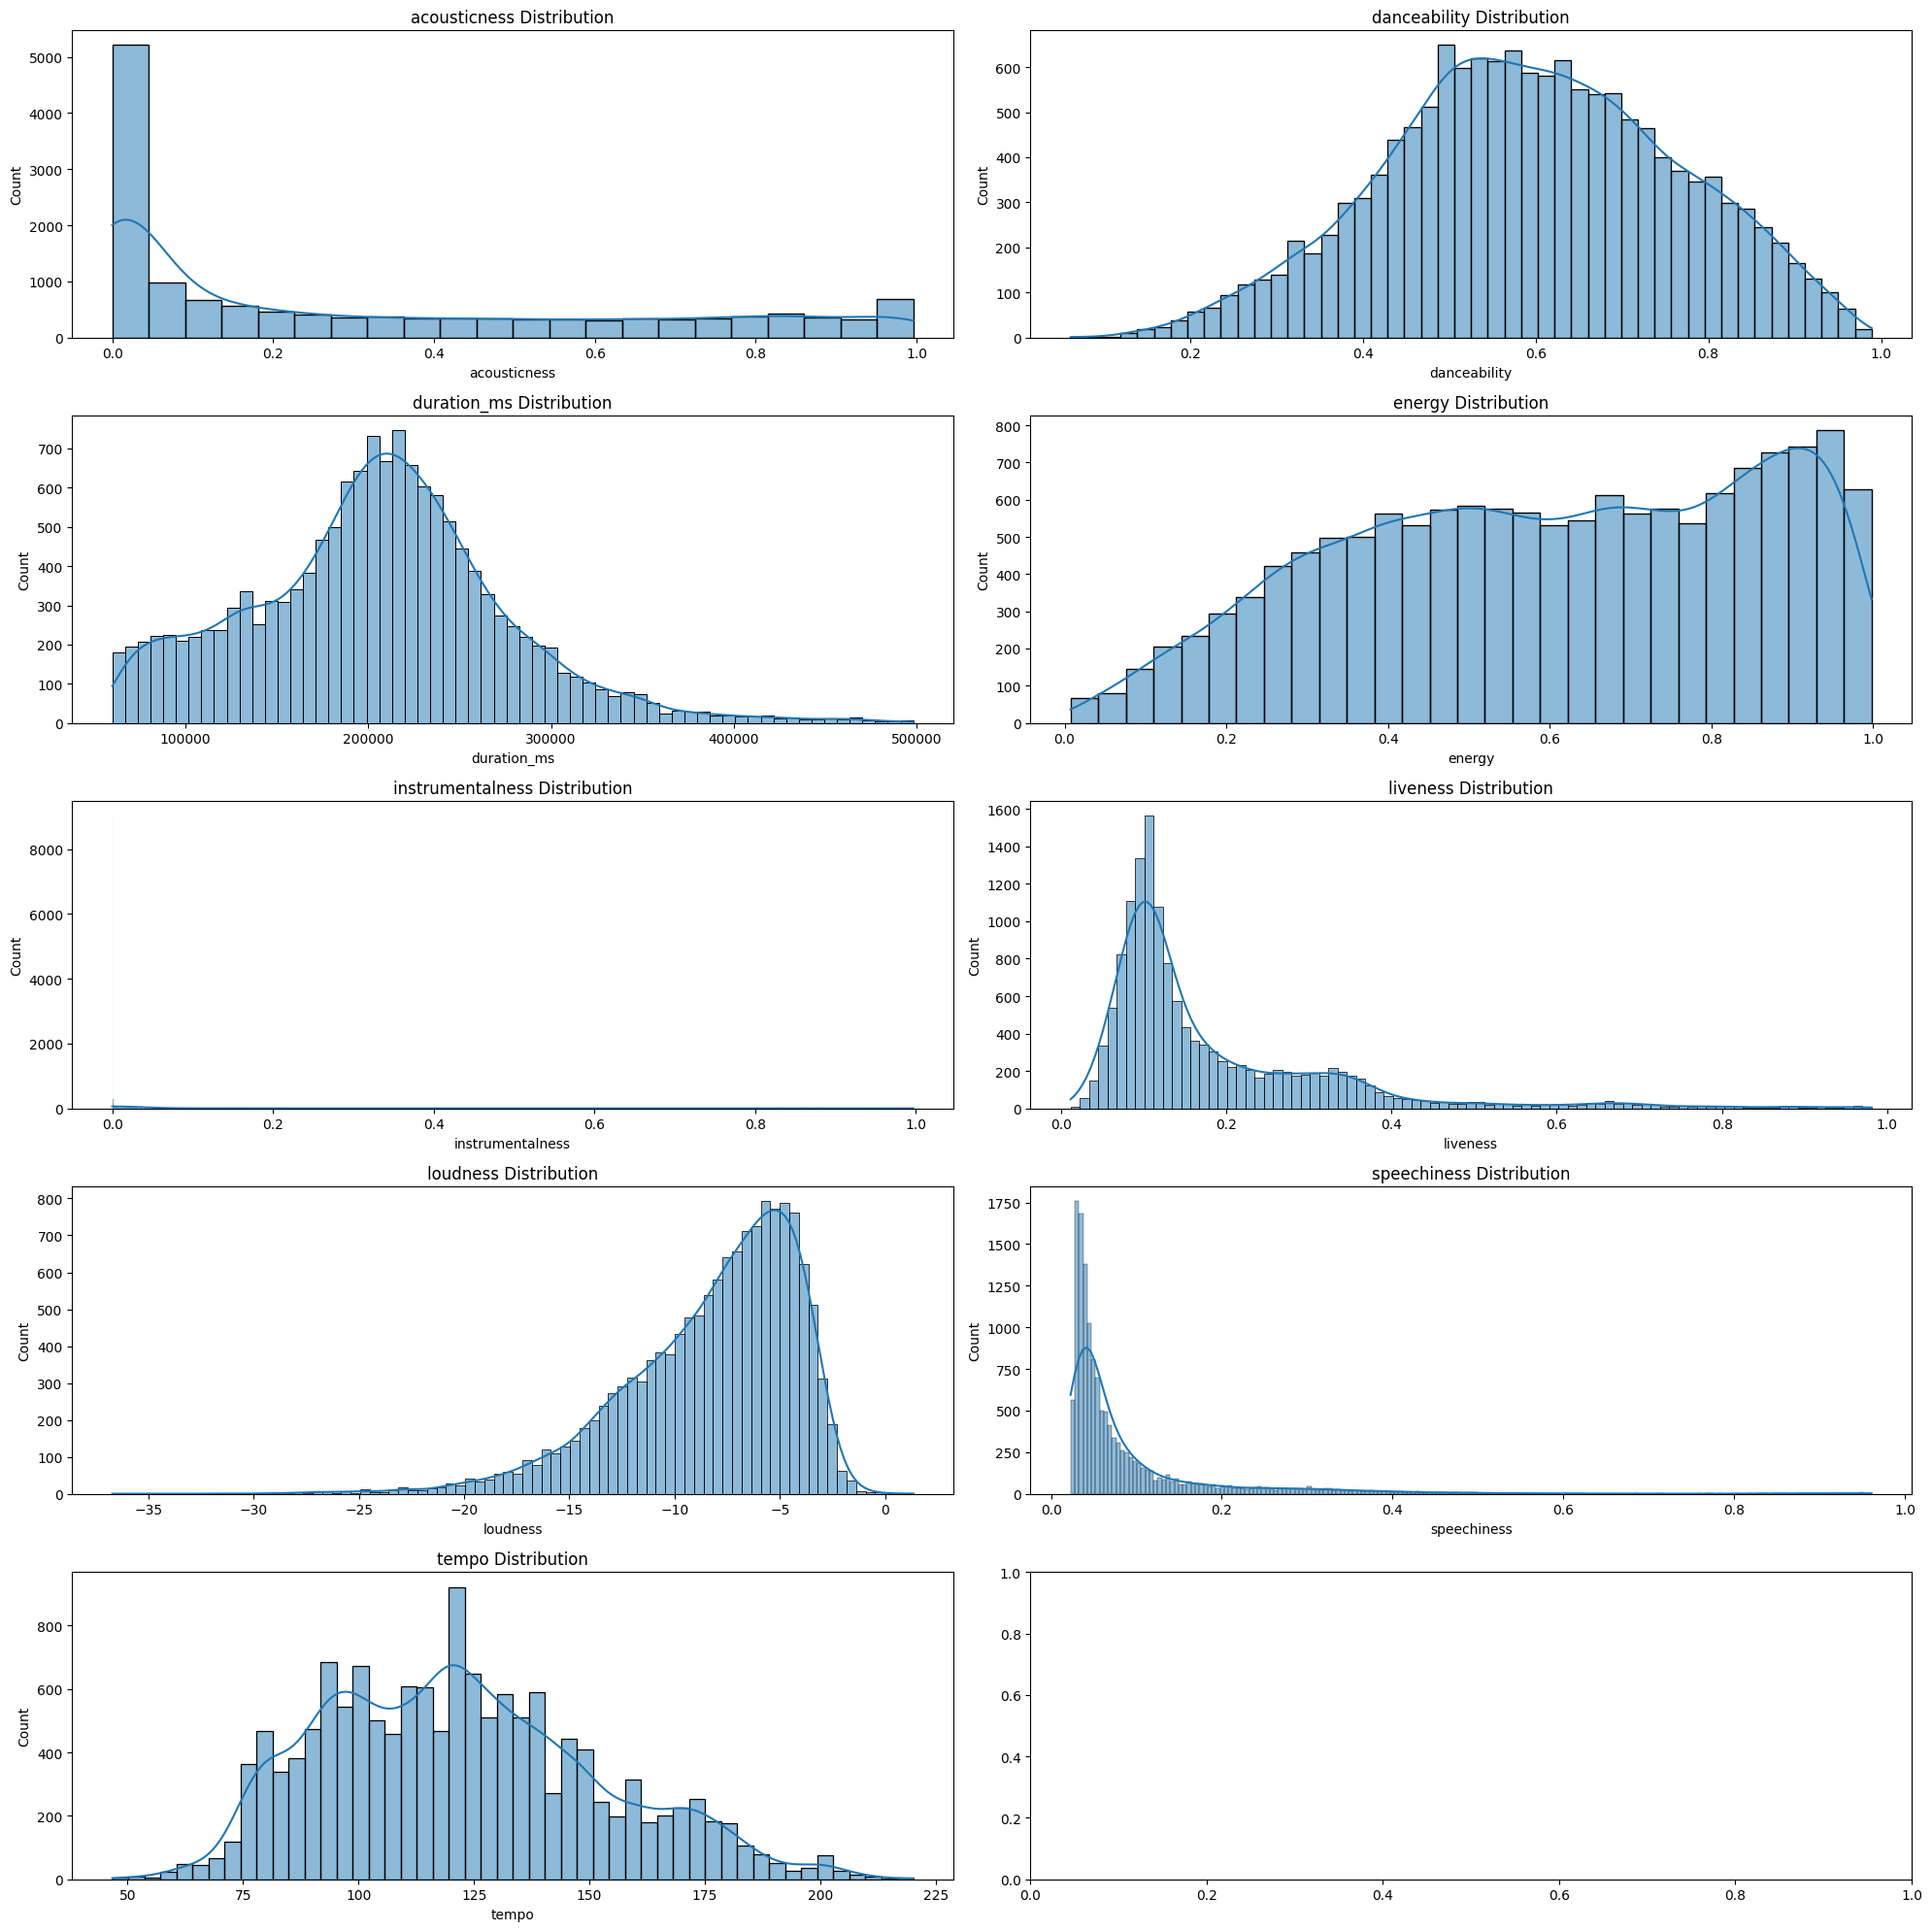

In [28]:
# Create a list of the columns to plot with audio features, duration and genre count
columns = ['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo']

# Create a figure and axis to plot on
fig, ax = plt.subplots(5, 2, figsize=(20, 20))

# Flatten the axis to make it easier to iterate over
ax = ax.flatten()

# Iterate over the columns and plot each one
for i, col in enumerate(columns):
    sns.histplot(childrens_music[col], kde=True, ax=ax[i])
    ax[i].set_title(f'{col} Distribution')

# Display the plots
plt.tight_layout()
plt.show()


##### Popularity distribution

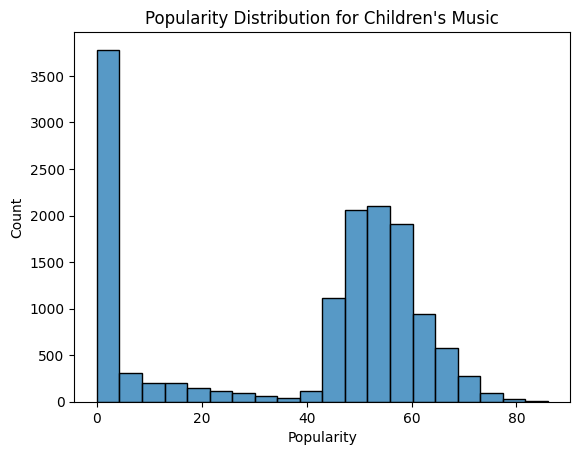

37.217489421720735


In [29]:
childrens_music = data[data['genre'] == 'Children\'s Music']
# plot the distribution of popularity for children's music
sns.histplot(childrens_music['popularity'])
plt.title('Popularity Distribution for Children\'s Music')
plt.xlabel('Popularity')
plt.ylabel('Count')
plt.show()
print(childrens_music['popularity'].mean())

In [30]:
# Dive deeper into instrumentalness
instrumentalness = childrens_music['instrumentalness']
instrumentalness.describe()

# show the most common values for instrumentalness and how many songs are above 0
instrumentalness.value_counts().head(10), childrens_music.shape[0]

(instrumentalness
 0.000000    4856
 0.000123      13
 0.000001      12
 0.000011      12
 0.000106      12
 0.000011      11
 0.000001      11
 0.001030      11
 0.000108      10
 0.000013      10
 Name: count, dtype: int64,
 14180)

##### Test a model to approximate most important features

In [31]:
# Run a test to see what feature is the most important
# We will use the RandomForestClassifier for this as it is a good model for feature importance and maybe the model we will use for the final model

# Create a new DataFrame with only the audio features and the popularity label
X = childrens_music[['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo']]
y = childrens_music['popularity_label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_0 = RandomForestClassifier(n_estimators=100, random_state=42)
model_0.fit(X_train, y_train)
y_pred = model_0.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         hit       0.71      0.84      0.77      1406
        miss       0.81      0.65      0.72      1430

    accuracy                           0.75      2836
   macro avg       0.76      0.75      0.75      2836
weighted avg       0.76      0.75      0.75      2836



In [32]:
feature_importances = pd.DataFrame(model_0.feature_importances_, index=X_train.columns, columns=['importance']).sort_values('importance', ascending=False)
print("feature importances")
print(feature_importances)

feature importances
                  importance
loudness            0.175411
acousticness        0.172624
danceability        0.138263
energy              0.136684
tempo               0.101936
speechiness         0.097058
liveness            0.091097
instrumentalness    0.086927


####  Conclusion on Children's Music dataset

##### Comments
- The 2 biggest artists are contributing to 10% of the dataset which is not to much to make the dataset biased 
- The dataset need some scaling and normalization to be able to use it in a model
- the target variable is now miss or hit and popularity is not needed anymore
- The most import features can be viewed above.
- The dataset is now free from weird values and duplicates

##### Next steps
- preform log transformation on the dataset to make it a tiny bit more normal distributed
- split the dataset into a train and test set before scaling to prevent data leakage
- scale the dataset before preforming PCA
- preform PCA to reduce the dimensionality of the dataset

##### Log transformation

/tmp/ipykernel_29570/465052090.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  childrens_music['liveness'] = np.log1p(childrens_music['liveness'])
/tmp/ipykernel_29570/465052090.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  childrens_music['speechiness'] = np.log1p(childrens_music['speechiness'])


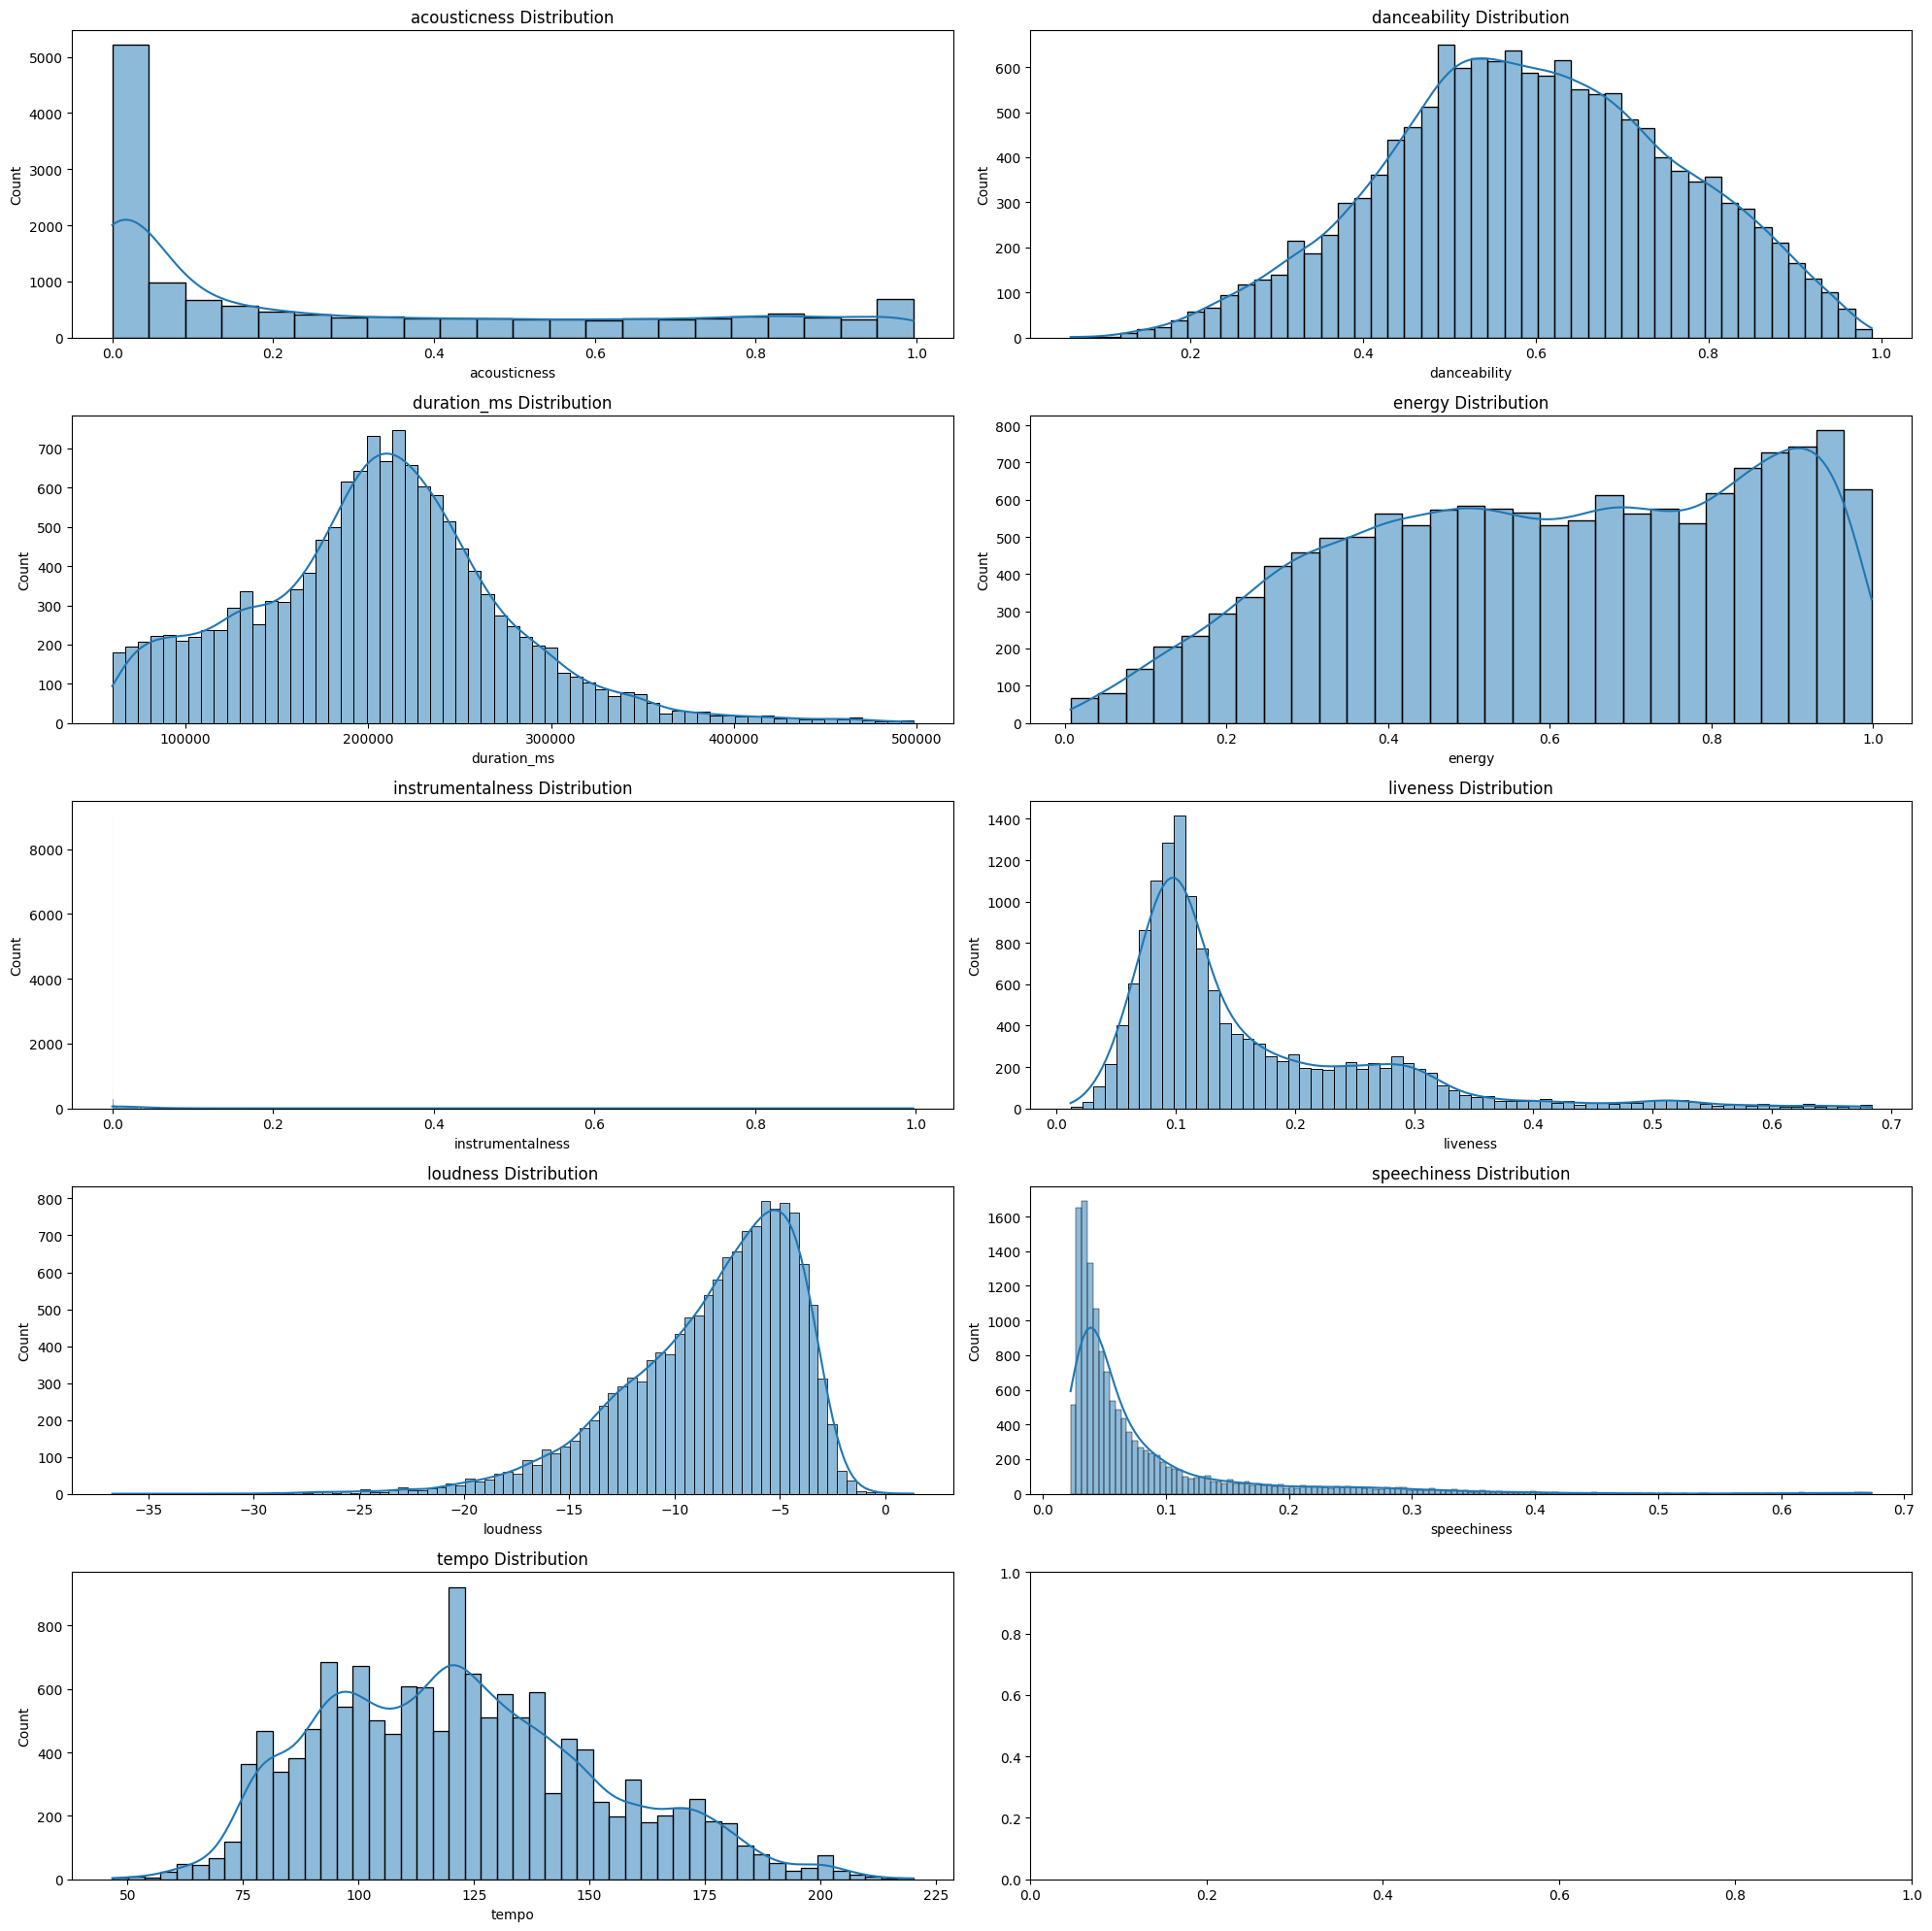

In [33]:
# preform logtransofrmation on livness, speechiness
childrens_music['liveness'] = np.log1p(childrens_music['liveness'])
childrens_music['speechiness'] = np.log1p(childrens_music['speechiness'])

# Create a figure and axis to plot on
fig, ax = plt.subplots(5, 2, figsize=(20, 20))

# Flatten the axis to make it easier to iterate over
ax = ax.flatten()

# Iterate over the columns and plot each one
for i, col in enumerate(columns):
    sns.histplot(childrens_music[col], kde=True, ax=ax[i])
    ax[i].set_title(f'{col} Distribution')

# Display the plots
plt.tight_layout()
plt.show()

# get data to csv
childrens_music.to_csv('childrens_music.csv', index=False)

In [34]:
# What data do we want and what order do we want it
X = childrens_music[['track_name', 'artist_name', 'track_id','mode', 'time_signature','acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'duration_ms', 'valence']]
y = childrens_music['popularity_label']

# Split the data into a training and testing set for final model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.head()

,track_name,artist_name,track_id,mode,time_signature,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,duration_ms,valence
73699,Adome (Ghana),Kimbo Children's Music,1M15KNP9SrC0V8Hp72unfD,0,4,0.55000,0.648,0.343,0.000013,0.083238,-16.401,0.309688,138.804,125200,0.194
99620,Better Days,The Goo Goo Dolls,2CWYATyxjd8tOsXdyuRWUv,1,4,0.00174,0.486,0.592,0.001140,0.089384,-5.176,0.029365,113.228,213267,0.329
71740,Three Little Ducks,Old Town School of Folk Music,063ugdBIIFpstBUxJclVv1,1,4,0.58100,0.693,0.334,0.000198,0.095310,-8.455,0.046502,145.504,74733,0.520
103452,Halaga,Parokya Ni Edgar,6pz4tdLoIDJdnpXnisSDCK,1,4,0.13200,0.489,0.570,0.000001,0.242162,-9.197,0.035753,134.486,352120,0.643
73038,Itsy Bitsy Spider,Music For Little People Choir,3cc6oBhhq7AwhdHuPsCvJn,1,4,0.69300,0.797,0.117,0.000000,0.308220,-18.264,0.069060,98.930,152200,0.282


In [35]:
predict_features = ['mode', 'time_signature','acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']

model_2 = RandomForestClassifier(n_estimators=100, random_state=42)

model_2.fit(X_train[predict_features], y_train)

y_pred = model_2.predict(X_test[predict_features])

print(classification_report(y_test, y_pred))

feature_importances = pd.DataFrame(model_2.feature_importances_, index=predict_features, columns=['importance']).sort_values('importance', ascending=False)
feature_importances

              precision    recall  f1-score   support

         hit       0.72      0.87      0.79      1406
        miss       0.84      0.67      0.75      1430

    accuracy                           0.77      2836
   macro avg       0.78      0.77      0.77      2836
weighted avg       0.78      0.77      0.77      2836



,importance
acousticness,0.158236
loudness,0.157932
valence,0.141130
energy,0.120445
danceability,0.097833
tempo,0.079131
speechiness,0.078212
liveness,0.072485
instrumentalness,0.068506
mode,0.018725


#### Scaling selection
Standard scaler: This technique transforms the features so they have the properties of a standard normal distribution with a mean of 0 and a standard deviation of 1. It's useful when your data follows a Gaussian distribution and when using algorithms sensitive to variance in the data, such as Support Vector Machines (SVMs) and Principal Component Analysis (PCA). From this we will exclude genre count.

##### Comments
Standard scaler: This technique transforms the features so they have the properties of a standard normal distribution with a mean of 0 and a standard deviation of 1. It's useful when your data follows a Gaussian distribution and when using algorithms sensitive to variance in the data, such as Support Vector Machines (SVMs) and Principal Component Analysis (PCA). From this we will exclude genre count.

In [36]:

# Selecting the numerical features for standardization
numerical_features = ['acousticness', 'danceability', 'duration_ms', 'energy', 
                      'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']

# Standardizing the numerical features
scaler = StandardScaler()

# Fit and transform the training data
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])

# Transform the testing data
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

X_test.head()

,track_name,artist_name,track_id,mode,time_signature,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,duration_ms,valence
77903,Daughter (Remastered),Pearl Jam,53eJFr4Mfbw5PXJ01K6cFw,1,4,-0.895943,0.119551,0.398200,-0.354155,-0.922453,-0.342482,-0.644101,-0.823430,0.426398,0.828177
79106,Call It What You Want,Foster The People,3u1Er1rkjn1oSz1xdZH3ZD,0,4,-0.773292,0.275321,1.451802,-0.371993,1.821584,0.960524,-0.298402,-0.290540,0.490035,0.792077
74866,Ringa Ringa Little Finger,Radha,4muLYTF9CenwUG8KGpnefp,1,4,0.871565,0.850472,-1.796473,-0.373213,-0.193042,-1.289135,3.690678,0.436160,-1.728958,-1.638656
100418,Change On Me (feat. Leuca),Xavier Omär,2j7qlbFwdLSB1HP3GJNpNi,0,4,-0.137513,0.598843,-0.464561,-0.373213,-0.509185,-0.097429,0.454474,0.539266,0.299351,-0.704067
76694,Tenderly,Little Apple Band,1ET6rWY5H7QIymsqIkRVvF,1,4,-0.706621,1.114082,0.537355,-0.373145,-0.525289,0.394367,0.144807,-1.522067,-1.327371,1.129010


In [37]:
predict_features = ['mode', 'time_signature','acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']

model_2 = RandomForestClassifier(n_estimators=100, random_state=42)

model_2.fit(X_train[predict_features], y_train)

y_pred = model_2.predict(X_test[predict_features])

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         hit       0.72      0.88      0.79      1406
        miss       0.85      0.67      0.75      1430

    accuracy                           0.77      2836
   macro avg       0.79      0.78      0.77      2836
weighted avg       0.79      0.77      0.77      2836



### Step number 5 PCA

##### Checking high correlation and if PCA is needed

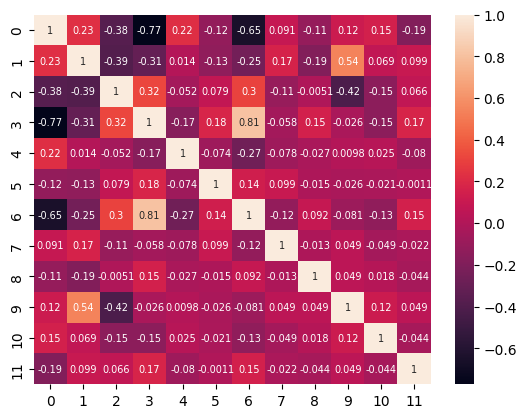

PCA is not recommended based on the correlation matrix. There are 4 pairs of highly correlated variables.


In [38]:
# Assuming X_train[features] is your scaled dataset for training
features = ['acousticness', 'danceability', 'duration_ms', 'energy', 
            'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'mode', 'time_signature']

# Correlation analysis
corr_matrix = np.corrcoef(X_train[features].T)
sns.heatmap(corr_matrix, annot=True, annot_kws={"size": 7})

plt.show()

high_correlation_threshold = 0.7 # 

# Calculate the number of variables with at least one high correlation
# We subtract the count by the length of the matrix to ignore the diagonal (self-correlation)
high_correlations = np.sum((np.abs(corr_matrix) > high_correlation_threshold) & (corr_matrix != 1)) / 2


# Decide whether PCA is recommended
# This threshold can be adjusted based on the size of the matrix or domain knowledge
pca_recommended = high_correlations > len(corr_matrix) * 0.5

print(f"PCA is {'recommended' if pca_recommended else 'not recommended'} based on the correlation matrix. There are {int(high_correlations)} pairs of highly correlated variables.")

#### We decided to use PCA, now find the optimal number of components

##### Because we want to see the impact of the features on the target variable and we want to see if we can reduce the dimensionality of the dataset. But from the analysis we can see that the dataset is not to big so we might not need to use PCA and the correlation between the features are not to high so we might not need to use PCA. But we will still use it to see if we can reduce the dimensionality of the dataset.

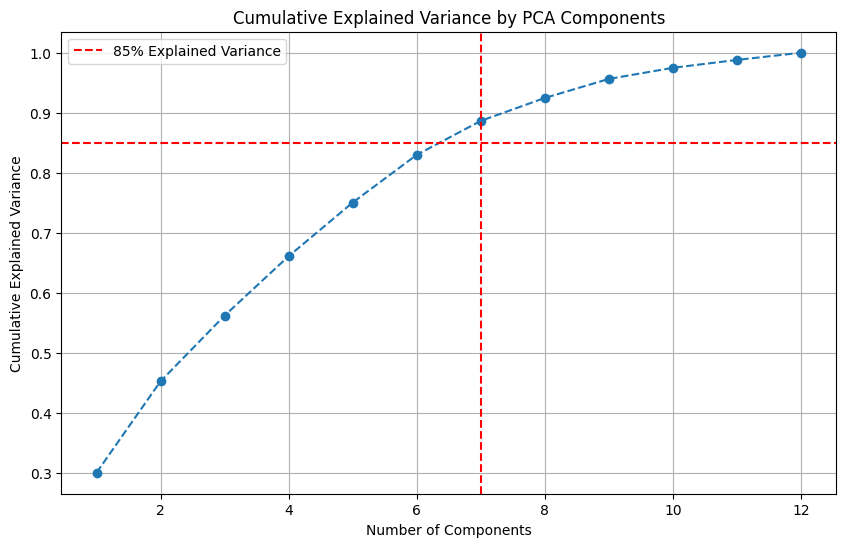

Optimal number of components to retain 85% of the variance: 7


In [39]:

pca = PCA()
pca.fit(X_train[features])

# Calculating the cumulative explained variance ratio
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)
limit = 0.85

# Plotting the cumulative explained variance to visualize the optimal number of components
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.axhline(y=limit, color='r', linestyle='--', label='85% Explained Variance')
plt.axvline(x=np.where(cumulative_explained_variance >= limit)[0][0] + 1, color='r', linestyle='--')
plt.legend(loc='best')
plt.grid(True)
plt.show()

# To find the exact number of components explaining 85% of the variance
optimal_n_components = np.where(cumulative_explained_variance >= limit)[0][0] + 1
print(f"Optimal number of components to retain 85% of the variance: {optimal_n_components}")

# Now, fitting PCA again with the optimal number of components found
pca_optimal = PCA(n_components=optimal_n_components)
X_train_pca_optimal = pca_optimal.fit_transform(X_train[features])
X_test_pca_optimal = pca_optimal.transform(X_test[features])

#### Applying PCA

In [40]:
# If needed, creating a DataFrame for the PCA-transformed training data for easier analysis
pca_columns = [f'PC{i+1}' for i in range(optimal_n_components)]
pca_train_df = pd.DataFrame(X_train_pca_optimal, columns=pca_columns)

# Similarly, creating a DataFrame for the PCA-transformed testing data
pca_test_df = pd.DataFrame(X_test_pca_optimal, columns=pca_columns)

# Display the first few rows of the PCA-transformed training DataFrame
print(pca_train_df.head())

# Additionally, to examine the variance explained by the chosen components
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = explained_variance_ratio.cumsum()

print("Explained variance ratio by component:", explained_variance_ratio)
print("Cumulative variance explained:", cumulative_variance)

        PC1       PC2       PC3       PC4       PC5       PC6       PC7
0  2.154705  0.670679  1.594052  1.438356 -1.674883  1.230622 -0.690494
1 -1.160721  0.531715 -0.481415 -0.610718 -0.661038 -0.211847 -0.529322
2  1.644301 -0.450420 -0.794160  0.691374 -0.706281 -0.850724 -0.890598
3 -1.142298  0.636464  0.092729  0.142429  0.234750 -0.515287  1.893449
4  2.892304  1.036371  1.521488 -0.211086  0.235362 -1.405630  0.469740
Explained variance ratio by component: [0.30047063 0.15230412 0.10938786 0.09899474 0.08933244 0.07948432
 0.05652529 0.03819371 0.03167278 0.01852917 0.01311881 0.01198612]
Cumulative variance explained: [0.30047063 0.45277475 0.56216261 0.66115735 0.7504898  0.82997412
 0.88649941 0.92469312 0.9563659  0.97489507 0.98801388 1.        ]


#### Checking approxiate performance of PCA

In [41]:
# Model with PCA
model_pca = RandomForestClassifier(n_estimators=100, random_state=42)

model_pca.fit(X_train_pca_optimal, y_train)

y_pred_pca = model_pca.predict(X_test_pca_optimal)

print(classification_report(y_test, y_pred_pca))

              precision    recall  f1-score   support

         hit       0.73      0.88      0.80      1406
        miss       0.85      0.68      0.75      1430

    accuracy                           0.78      2836
   macro avg       0.79      0.78      0.78      2836
weighted avg       0.79      0.78      0.78      2836



## Model

### Classification model selection

#### Step 1. testing each model we want to use

- Random Forest classifier
- Support Vector Machine
- XGBoost
- Logistic Regression 
- Decision Tree Classifier
- K-Nearest Neighbors Classifier


#### Step 2. Comparing the models with cross validation

#### Step 3. Hyperparameter tuning and cross validation to compare again

#### Step 4. Final comparison and plotting the results

In [42]:
#our datasets
# The datasets with PCA components
X_train_pca_optimal, X_test_pca_optimal

# The datasets without PCA components
X_train_normal = X_train[features]
X_test_normal = X_test[features]

In [43]:
# Convert miss or hit to 0 or 1 (some models require this) on the y_train and y_test
y_train = y_train.replace({'miss': 0, 'hit': 1})
y_test = y_test.replace({'miss': 0, 'hit': 1})

### Hyperparameter tuning

#### RandomizedSearchCV Optimization

In [44]:
set_cross_vals = 5
set_iter_vals = 75
random_seed = 42

##### Random Forest Classifier

In [45]:
# Initialize the classifier
rfc = RandomForestClassifier()

# Define the parameter distribution
param_dist = {
    'n_estimators': [100, 200, 250, 300, 400, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the RandomizedSearchCV object for accuracy optimization
random_search = RandomizedSearchCV(estimator=rfc, param_distributions=param_dist, n_iter=set_iter_vals, cv=set_cross_vals, scoring='accuracy', verbose=2, n_jobs=-1, random_state=random_seed)

# Fit the random search to the data
random_search.fit(X_train_normal, y_train)

# Best parameters found
print("Best Parameters: ", random_search.best_params_)
rfc__best_params = random_search.best_params_
# Predictions
RFC_Predict = random_search.predict(X_test_normal)

# Evaluate the model for accuracy
RFC_accuracy = accuracy_score(y_test, RFC_Predict)
print("Accuracy: " + str(RFC_accuracy))

# Evaluate the model for AUC
rfc_auc = roc_auc_score(y_test, RFC_Predict)
print("AUC: " + str(rfc_auc))

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   2.6s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   2.4s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   2.5s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   2.7s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   2.6s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   3.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   2.4s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time= 

##### Support Vector Machine

In [46]:
# Define the SVC model
svc_model = SVC()

# Specify the parameter distribution
param_distributions = {
    'C': np.logspace(-2, 3, 6),  
    'kernel': ['rbf', 'sigmoid'],  # Including 'sigmoid' kernel
    'gamma': ['scale', 'auto'],  # Kernel coefficient for 'rbf', 'poly', and 'sigmoid'
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    svc_model,
    param_distributions=param_distributions,
    n_iter=set_iter_vals,  # Number of parameter settings that are sampled
    cv=set_cross_vals,  # Cross-validation folding strategy
    scoring='accuracy',  # Scoring method
    random_state=42,
    verbose=2,
    n_jobs=-1  # Use all available cores
)

# Fit RandomizedSearchCV to the PCA-transformed training data
random_search.fit(X_train_normal, y_train)

# Print the best parameters
print("Best Parameters:", random_search.best_params_)
SVC__best_params = random_search.best_params_
# Predict with the best estimator
SVC_predict = random_search.predict(X_test_normal)

# Evaluate the model with the optimized parameters
SVC_accuracy = accuracy_score(y_test, SVC_predict)
print("Accuracy:", SVC_accuracy)
svc_auc = roc_auc_score(y_test, SVC_predict)
print("AUC:", svc_auc)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


/home/morrissimons/.local/lib/python3.8/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 24 is smaller than n_iter=75. Running 24 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


[CV] END ....................C=0.01, gamma=scale, kernel=rbf; total time=   3.4s
[CV] END ....................C=0.01, gamma=scale, kernel=rbf; total time=   3.8s
[CV] END ....................C=0.01, gamma=scale, kernel=rbf; total time=   4.1s
[CV] END .....................C=0.01, gamma=auto, kernel=rbf; total time=   4.1s
[CV] END .....................C=0.01, gamma=auto, kernel=rbf; total time=   4.1s
[CV] END ....................C=0.01, gamma=scale, kernel=rbf; total time=   4.3s
[CV] END ....................C=0.01, gamma=scale, kernel=rbf; total time=   4.4s
[CV] END .....................C=0.01, gamma=auto, kernel=rbf; total time=   4.5s
[CV] END .....................C=0.01, gamma=auto, kernel=rbf; total time=   4.5s
[CV] END .....................C=0.01, gamma=auto, kernel=rbf; total time=   4.7s
[CV] END ................C=0.01, gamma=scale, kernel=sigmoid; total time=   5.9s
[CV] END ................C=0.01, gamma=scale, kernel=sigmoid; total time=   6.1s
[CV] END ................C=0

##### XGBoost

In [47]:
# Define the XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Specify the parameter distribution
param_distributions = {
    'n_estimators': [100,120, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.04, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6, 7, 8],
    'min_child_weight': [1, 5, 10],
    'gamma': [0.5, 1, 1.5, 2, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    xgb_model,
    param_distributions=param_distributions,
    n_iter=set_iter_vals,  # Adjust based on your computational budget
    cv=set_cross_vals,
    scoring='accuracy',
    random_state=random_seed,
    verbose=2,
    n_jobs=-1  # Use all available cores
)

# Fit RandomizedSearchCV to the training data
random_search.fit(X_train_normal, y_train)

# Print the best parameters
print("Best Parameters:", random_search.best_params_)
XBG__best_params = random_search.best_params_
# Predict with the best estimator
XGB_predict = random_search.predict(X_test_normal)

# Evaluate the model with the optimized parameters
xgb_accuracy = accuracy_score(y_test, XGB_predict)
print("Accuracy:", xgb_accuracy)
xgb_auc = roc_auc_score(y_test, XGB_predict)
print("AUC:", xgb_auc)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV] END colsample_bytree=1.0, gamma=5, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=5, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=1.0, gamma=5, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=5, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=1.0, gamma=5, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.8, gamma=5, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=300, subsample=0.6; total time=   0.3s
[CV] END colsample_bytree=0.8, gamma=5, learning_rate=0.1, max_depth=7, mi

##### Logistic Regression

In [48]:
# Define the Logistic Regression model
lr_model = LogisticRegression()

# Specify the parameter distributions
param_distributions = {
    'C': np.logspace(-4, 4, 20),  # Wide range of values for C
    'penalty': ['l1', 'l2'],  # Common penalties for logistic regression
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 1000, 10000]  # Different values for maximum iterations
}
# 'liblinear' works well with 'l1' and 'l2' penalties.
lr_model.solver = 'liblinear'

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    lr_model,
    param_distributions=param_distributions,
    n_iter=set_cross_vals,  # Number of parameter settings sampled
    cv=set_iter_vals,  # 5-fold cross-validation
    scoring='accuracy',  # Scoring metric to optimize
    random_state=random_seed,
    verbose=2,
    n_jobs=-1  # Use all available cores
)

# Fit RandomizedSearchCV to the training data
random_search.fit(X_train_normal, y_train)

# Print the best parameters
print("Best Parameters:", random_search.best_params_)

# Predict with the best estimator
lr_predict = random_search.predict(X_test_normal)
lr__best_params = random_search.best_params_
# Evaluate the model with the optimized parameters
LR_accuracy = accuracy_score(y_test, lr_predict)
print("Accuracy:", LR_accuracy)
lr_auc = roc_auc_score(y_test, lr_predict)
print("AUC:", lr_auc)

Fitting 75 folds for each of 5 candidates, totalling 375 fits
[CV] END C=0.0006951927961775605, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.0006951927961775605, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.0006951927961775605, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.0006951927961775605, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.0006951927961775605, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.0006951927961775605, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.0006951927961775605, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.0006951927961775605, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.0006951927961775605, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.0006951927961775605, max_iter=100, penalty=l1, solve

##### Decision Tree Classifier

In [49]:
# Define the Decision Tree Classifier
dt_model = DecisionTreeClassifier()

# Specify the parameter distributions
param_distributions = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': np.arange(2, 11),
    'min_samples_leaf': np.arange(1, 11),
    'max_features': ['sqrt', 'log2', None] + list(range(1, X_train_normal.shape[1] + 1)),
    'criterion': ['gini', 'entropy']
}


# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    dt_model,
    param_distributions=param_distributions,
    n_iter=set_iter_vals,  # Number of parameter settings sampled
    cv=set_cross_vals,  # 5-fold cross-validation
    scoring='accuracy',  # Scoring metric to optimize
    random_state=random_seed,
    verbose=2,
    n_jobs=-1  # Use all available cores
)

# Fit RandomizedSearchCV to the training data
random_search.fit(X_train_normal, y_train)
dt_best_params = random_search.best_params_
# Print the best parameters
print("Best Parameters:", random_search.best_params_)

# Predict with the best estimator
dt_predict = random_search.predict(X_test_normal)

# Evaluate the model with the optimized parameters
DT_accuracy = accuracy_score(y_test, dt_predict)
print("Accuracy:", DT_accuracy)
dt_auc = roc_auc_score(y_test, dt_predict)
print("AUC:", dt_auc)


Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV] END criterion=gini, max_depth=50, max_features=3, min_samples_leaf=8, min_samples_split=9; total time=   0.0s
[CV] END criterion=gini, max_depth=50, max_features=3, min_samples_leaf=8, min_samples_split=9; total time=   0.0s
[CV] END criterion=gini, max_depth=50, max_features=3, min_samples_leaf=8, min_samples_split=9; total time=   0.0s
[CV] END criterion=gini, max_depth=50, max_features=3, min_samples_leaf=8, min_samples_split=9; total time=   0.0s
[CV] END criterion=gini, max_depth=50, max_features=3, min_samples_leaf=8, min_samples_split=9; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=7, min_samples_leaf=6, min_samples_split=7; total time=   0.1s
[CV] END criterion=gini, max_depth=None, max_features=7, min_samples_leaf=6, min_samples_split=7; total time=   0.1s
[CV] END criterion=gini, max_depth=None, max_features=7, min_samples_leaf=6, min_samples_split=7; total time=   0.1s
[CV] END cri

##### KNears Neighbors Classifier

In [50]:
# Define the K-Nearest Neighbors Classifier
knn_model = KNeighborsClassifier()

# Specify the parameter distributions
param_distributions = {
    'n_neighbors': np.arange(1, 200),  # Exploring a wide range of neighbors
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    knn_model,
    param_distributions=param_distributions,
    n_iter=set_iter_vals,  # Number of parameter settings sampled
    cv=set_cross_vals,  # 5-fold cross-validation
    scoring='accuracy',  # Scoring metric to optimize
    random_state=random_seed,
    verbose=2,
    n_jobs=-1  # Use all available cores, note that KNN can be slow for large datasets
)

# Fit RandomizedSearchCV to the training data
random_search.fit(X_train_normal, y_train)

# Print the best parameters
print("Best Parameters:", random_search.best_params_)
knn_best_params = random_search.best_params_
# Predict with the best estimator
knn_predict = random_search.predict(X_test_normal)

# Evaluate the model with the optimized parameters
KNN_accuracy = accuracy_score(y_test, knn_predict)
print("Accuracy:", KNN_accuracy)
knn_auc = roc_auc_score(y_test, knn_predict)
print("AUC:", knn_auc)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV] END ..............n_neighbors=16, p=2, weights=distance; total time=   0.3s
[CV] END ..............n_neighbors=16, p=2, weights=distance; total time=   0.3s
[CV] END ..............n_neighbors=16, p=2, weights=distance; total time=   0.3s
[CV] END ..............n_neighbors=16, p=2, weights=distance; total time=   0.3s
[CV] END ..............n_neighbors=16, p=2, weights=distance; total time=   0.3s
[CV] END .............n_neighbors=195, p=2, weights=distance; total time=   0.5s
[CV] END .............n_neighbors=195, p=2, weights=distance; total time=   0.5s
[CV] END .............n_neighbors=195, p=2, weights=distance; total time=   0.6s
[CV] END .............n_neighbors=195, p=2, weights=distance; total time=   0.6s
[CV] END .............n_neighbors=195, p=2, weights=distance; total time=   0.6s
[CV] END ...............n_neighbors=17, p=2, weights=uniform; total time=   0.3s
[CV] END ..............n_neighbors=174, p=1, we

In [51]:
# Define the models
rfc_final = RandomForestClassifier(n_estimators=rfc__best_params['n_estimators'], max_depth=rfc__best_params['max_depth'], min_samples_split=rfc__best_params['min_samples_split'], min_samples_leaf=rfc__best_params['min_samples_leaf'], bootstrap=rfc__best_params['bootstrap'])
svc_final = SVC(C=SVC__best_params['C'], kernel=SVC__best_params['kernel'], gamma=SVC__best_params['gamma'])
xgb_final = XGBClassifier(n_estimators=XBG__best_params['n_estimators'], learning_rate=XBG__best_params['learning_rate'], max_depth=XBG__best_params['max_depth'], min_child_weight=XBG__best_params['min_child_weight'], gamma=XBG__best_params['gamma'], subsample=XBG__best_params['subsample'], colsample_bytree=XBG__best_params['colsample_bytree'])
lr_final = LogisticRegression(C=lr__best_params['C'], penalty=lr__best_params['penalty'], solver=lr__best_params['solver'], max_iter=lr__best_params['max_iter'])
dt_final = DecisionTreeClassifier(max_depth=dt_best_params['max_depth'], min_samples_split=dt_best_params['min_samples_split'], min_samples_leaf=dt_best_params['min_samples_leaf'], max_features=dt_best_params['max_features'], criterion=dt_best_params['criterion'])
knn_final = KNeighborsClassifier(n_neighbors=knn_best_params['n_neighbors'], weights=knn_best_params['weights'], p=knn_best_params['p'])

# Cross-validation setup
cv = KFold(n_splits=10, shuffle=True, random_state=42)

# Function to run experiments for a single model and collect scores
def run_experiment(model, X, y, cv):
    scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    return scores

# Run the experiments for each model separately
# Replace 'X_test_normal' and 'y_test' with your actual datasets
rfc_scores = run_experiment(rfc_final, X_test_normal, y_test, cv)
svc_scores = run_experiment(svc_final, X_test_normal, y_test, cv)
xgb_scores = run_experiment(xgb_final, X_test_normal, y_test, cv)
lr_scores = run_experiment(lr_final, X_test_normal, y_test, cv)
dt_scores = run_experiment(dt_final, X_test_normal, y_test, cv)
knn_scores = run_experiment(knn_final, X_test_normal, y_test, cv)

# Combine the scores into a DataFrame for ranking
scores_df = pd.DataFrame({
    "RandomForestClassifier": rfc_scores,
    "SVC": svc_scores,
    "XGBClassifier": xgb_scores,
    "LogisticRegression": lr_scores,
    "DecisionTreeClassifier": dt_scores,
    "KNeighborsClassifier": knn_scores
})

# Rank the models based on their performance in each fold
ranks_df = scores_df.rank(axis=1, method='average', ascending=False)

# Calculate the average rank for each model across all folds
average_ranks = ranks_df.mean().sort_values()

print("Average Ranks:")
print(average_ranks)


Average Ranks:
SVC                       2.20
RandomForestClassifier    2.55
KNeighborsClassifier      3.10
LogisticRegression        3.55
XGBClassifier             3.60
DecisionTreeClassifier    6.00
dtype: float64


In [52]:
# calculate the mean of the score of each model
rfc_mean = rfc_scores.mean()
svc_mean = svc_scores.mean()
xgb_mean = xgb_scores.mean()
lr_mean = lr_scores.mean()
dt_mean = dt_scores.mean()
knn_mean = knn_scores.mean()

# Create a DataFrame with models and their mean scores
accuracy_ranking = pd.DataFrame({
    'Model': ['RFC', 'SVC', 'XGB', 'LR', 'DT', 'KNN'],
    'Mean Accuracy': [rfc_mean, svc_mean, xgb_mean, lr_mean, dt_mean, knn_mean]
})

# Rank models based on Mean Accuracy
accuracy_ranking['Rank'] = accuracy_ranking['Mean Accuracy'].rank(ascending=False)

# Calculate average rank (in this case, it's the same as Rank since we have only one metric)
accuracy_ranking = accuracy_ranking.sort_values(by='Rank')

# Print the DataFrame
print(accuracy_ranking)

  Model  Mean Accuracy  Rank
0   RFC       0.779274   1.0
1   SVC       0.778573   2.0
5   KNN       0.774339   3.0
2   XGB       0.771878   4.0
3    LR       0.769389   5.0
4    DT       0.731667   6.0


### Final Model evaluation

The best model based on accuracy is RFC with an accuracy of 0.732


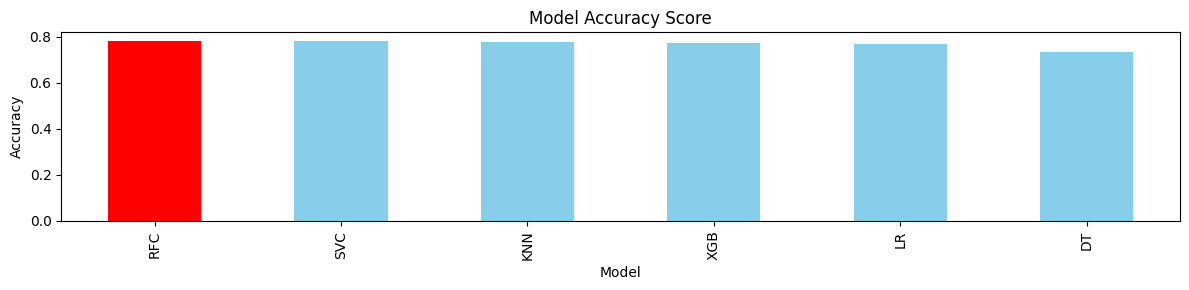

(  Model  Mean Accuracy  Rank
 0   RFC       0.779274   1.0
 1   SVC       0.778573   2.0
 5   KNN       0.774339   3.0
 2   XGB       0.771878   4.0
 3    LR       0.769389   5.0
 4    DT       0.731667   6.0,
 SVC                       2.20
 RandomForestClassifier    2.55
 KNeighborsClassifier      3.10
 LogisticRegression        3.55
 XGBClassifier             3.60
 DecisionTreeClassifier    6.00
 dtype: float64)

In [53]:
best_model_accuracy = accuracy_ranking.iloc[0]['Model']

print(f"The best model based on accuracy is {best_model_accuracy} with an accuracy of {accuracy_ranking.iloc[-1]['Mean Accuracy']:.3f}")

color_accuracy = ['skyblue' if model != best_model_accuracy else 'red' for model in accuracy_ranking['Model']]

# plot 

fig, ax = plt.subplots(1, 1, figsize=(12, 3))

accuracy_ranking.plot(kind='bar', x='Model', y='Mean Accuracy', ax=ax, legend=False, color=color_accuracy)
ax.set_title('Model Accuracy Score')
ax.set_ylabel('Accuracy')
plt.tight_layout()
plt.show()

# list format for the best model
after_opt_acc = accuracy_ranking

after_opt_acc, average_ranks